In [1]:
import warnings
warnings.simplefilter('ignore')

import re 
from time import time 
from scipy import stats 
import json

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline 

from IPython.display import display, Math, Latex 
from sklearn.linear_model import Lasso,Ridge,LogisticRegression 

from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix 

from sklearn.svm import SVC

from sklearn.model_selection import ShuffleSplit 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV

%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import SGDClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.metrics import make_scorer, roc_auc_score, log_loss, accuracy_score 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestClassifier

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import pandas as pd
A_train = pd.read_csv('/content/gdrive/My Drive/final_features.csv')

In [4]:
A_train.head()

,SK_ID_CURR,DAYS_CREDIT,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,AMT_CREDIT_SUM_LIMIT,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PCT,CREDIT_TERM_PCT,DAYS_EMPLOYED_PCT,ANNUITY_INCOME_PCT
0,100002,-1043.0,-967.0,40761.0,-758.0,-26.0,0.0,1,Cash loans,M,...,0.0,0.0,0.0,0.0,0.0,1.0,2.007889,0.060749,0.067329,0.121978
1,100010,-1939.5,-1138.0,495000.0,-578.0,-46.0,0.0,0,Cash loans,M,...,0.0,0.0,0.0,0.0,0.0,0.0,4.250000,0.027500,0.023820,0.116875
2,100019,-495.0,NaN,360000.0,-26.5,-8.0,135000.0,0,Cash loans,M,...,0.0,0.0,0.0,0.0,0.0,1.0,1.903314,0.067251,0.132562,0.128000
3,100032,-1169.5,-662.0,331875.0,-520.5,-28.0,0.0,0,Cash loans,M,...,0.0,0.0,0.0,0.0,0.0,0.0,2.906880,0.072862,0.077376,0.211800
4,100033,-195.0,NaN,675000.0,-169.0,-3.0,0.0,0,Cash loans,M,...,0.0,0.0,0.0,1.0,0.0,1.0,2.929000,0.072932,0.179708,0.213617


In [5]:
A_train.columns

Index(['SK_ID_CURR', 'DAYS_CREDIT', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_SUM',
       'DAYS_CREDIT_UPDATE', 'MONTHS_BALANCE', 'AMT_CREDIT_SUM_LIMIT',
       'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY_x', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_W

In [6]:
y = A_train['TARGET']
X = A_train.drop(['SK_ID_CURR','TARGET'], axis = 1)

In [7]:
application_null_vals = X.isna().sum().reset_index().rename(columns={'index':'column_name',0:'null_count'})
application_null_vals['percentage_cnt'] = application_null_vals['null_count']/len(X)*100
application_null_vals = application_null_vals[application_null_vals['percentage_cnt'] <= 30]
application_null_vals

,column_name,null_count,percentage_cnt
0,DAYS_CREDIT,0,0.000000
1,DAYS_ENDDATE_FACT,11441,12.397061
2,AMT_CREDIT_SUM,0,0.000000
3,DAYS_CREDIT_UPDATE,0,0.000000
4,MONTHS_BALANCE,0,0.000000
...,...,...,...
75,AMT_REQ_CREDIT_BUREAU_YEAR,0,0.000000
76,CREDIT_INCOME_PCT,0,0.000000
77,CREDIT_TERM_PCT,11,0.011919
78,DAYS_EMPLOYED_PCT,0,0.000000


In [8]:
application_null_vals['column_type'] = application_null_vals['column_name'].apply(lambda x: X[x].dtype)
application_null_vals[application_null_vals['percentage_cnt'] > 0]

,column_name,null_count,percentage_cnt,column_type
1,DAYS_ENDDATE_FACT,11441,12.397061,float64
13,AMT_ANNUITY_x,11,0.011919,float64
14,AMT_GOODS_PRICE,2,0.002167,float64
43,EXT_SOURCE_2,24,0.026006,float64
44,EXT_SOURCE_3,5883,6.374610,float64
77,CREDIT_TERM_PCT,11,0.011919,float64
79,ANNUITY_INCOME_PCT,11,0.011919,float64


In [9]:
test_feature = A_train[application_null_vals['column_name'].tolist() + ['TARGET']]
test_feature['NAME_TYPE_SUITE'].fillna('Other_C', inplace=True) 
test_feature.head(7)

,DAYS_CREDIT,DAYS_ENDDATE_FACT,AMT_CREDIT_SUM,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,AMT_CREDIT_SUM_LIMIT,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_INCOME_PCT,CREDIT_TERM_PCT,DAYS_EMPLOYED_PCT,ANNUITY_INCOME_PCT,TARGET
0,-1043.0,-967.0,40761.0,-758.0,-26.0,0.0,Cash loans,M,N,Y,...,0.0,0.0,0.0,0.0,1.0,2.007889,0.060749,0.067329,0.121978,1
1,-1939.5,-1138.0,495000.0,-578.0,-46.0,0.0,Cash loans,M,Y,Y,...,0.0,0.0,0.0,0.0,0.0,4.250000,0.027500,0.023820,0.116875,0
2,-495.0,NaN,360000.0,-26.5,-8.0,135000.0,Cash loans,M,Y,Y,...,0.0,0.0,0.0,0.0,1.0,1.903314,0.067251,0.132562,0.128000,0
3,-1169.5,-662.0,331875.0,-520.5,-28.0,0.0,Cash loans,M,N,Y,...,0.0,0.0,0.0,0.0,0.0,2.906880,0.072862,0.077376,0.211800,0
4,-195.0,NaN,675000.0,-169.0,-3.0,0.0,Cash loans,M,Y,Y,...,0.0,0.0,1.0,0.0,1.0,2.929000,0.072932,0.179708,0.213617,0
5,-1552.0,-1492.0,78907.5,-1492.0,-34.0,0.0,Cash loans,F,N,N,...,0.0,0.0,0.0,0.0,2.0,2.211200,0.104988,0.339448,0.232150,0
6,-1904.0,-1323.0,166860.0,-1320.0,-61.5,0.0,Cash loans,F,N,Y,...,0.0,0.0,0.0,1.0,1.0,3.238250,0.036117,0.044654,0.116955,0


In [10]:
col_list =application_null_vals[application_null_vals['null_count'] != 0].reset_index(drop=True)['column_name'].tolist()
for col_idx in col_list:
    if 'AMT_REQ_CREDIT' in col_idx:
        print("null values replaced with 0: {}".format(col_idx))
        test_feature[col_idx].fillna(0,inplace=True)   
for col_idx in col_list:
    if 'CNT_SOCIAL_CIRCLE' in col_idx:
        print("null values replaced with 0: {}".format(col_idx))
        test_feature[col_idx].fillna(0,inplace=True) 
for col_idx in col_list:
    if 'CNT_FAM_MEMBERS' in col_idx:
        print("null values replaced with median: {}".format(col_idx))
        test_feature[col_idx].fillna(test_feature[col_idx].median(),inplace=True)  
for col_idx in col_list:
    if 'DAYS_ENDDATE_FACT' in col_idx:
        print("null values replaced with 0: {}".format(col_idx))
        test_feature[col_idx].fillna(0,inplace=True) 

for col_idx in col_list:
    if 'AMT_ANNUITY_x' in col_idx:
        print("null values replaced with 0: {}".format(col_idx))
        test_feature[col_idx].fillna(0,inplace=True) 

for col_idx in col_list:
    if 'CREDIT_TERM_PCT' in col_idx:
        print("null values replaced with 0: {}".format(col_idx))
        test_feature[col_idx].fillna(0,inplace=True) 
for col_idx in col_list:
    if 'ANNUITY_INCOME_PCT' in col_idx:
        print("null values replaced with 0: {}".format(col_idx))
        test_feature[col_idx].fillna(0,inplace=True) 
for col_idx in col_list:
    if 'EXT_SOURCE_3' in col_idx:
        print("null values replaced with 0: {}".format(col_idx))
        test_feature[col_idx].fillna(0,inplace=True)

for col_idx in col_list:
    if 'EXT_SOURCE_2' in col_idx:
        print("null values replaced with 0: {}".format(col_idx))
        test_feature[col_idx].fillna(0,inplace=True)

null values replaced with 0: DAYS_ENDDATE_FACT
null values replaced with 0: AMT_ANNUITY_x
null values replaced with 0: CREDIT_TERM_PCT
null values replaced with 0: ANNUITY_INCOME_PCT
null values replaced with 0: EXT_SOURCE_3
null values replaced with 0: EXT_SOURCE_2


In [11]:
def to_fill_category_value(df_object):
    if df_object['AMT_GOODS_PRICE'] != np.inf:
        return df_object['AMT_GOODS_PRICE']
        
    else:
        return A_train[A_train['NAME_FAMILY_STATUS']==df_object['NAME_FAMILY_STATUS']]['AMT_GOODS_PRICE'].values[0]

for col_idx in col_list:
    test_feature['AMT_GOODS_PRICE'] = test_feature['AMT_GOODS_PRICE'].fillna(np.inf)
    if 'AMT_GOODS_PRICE' in col_idx:
        print("filled with category median is: {}".format(col_idx))
        test_feature['AMT_GOODS_PRICE'] = test_feature.apply(lambda df_object: to_fill_category_value(df_object),axis=1)


filled with category median is: AMT_GOODS_PRICE


In [12]:
test_null_data = test_feature.isna().sum().reset_index().rename(columns={'index':'column_name',0:'null_count'})
test_null_data['percentage_cnt'] = test_null_data['null_count']/len(test_feature)*100
test_null_data = test_null_data[test_null_data['percentage_cnt']<= 30]
test_null_data['column_type'] = test_null_data['column_name'].apply(lambda x: test_feature[x].dtype)
test_null_data[test_null_data['percentage_cnt'] > 0]

,column_name,null_count,percentage_cnt,column_type


In [13]:
test_feature.isna().sum()

DAYS_CREDIT           0
DAYS_ENDDATE_FACT     0
AMT_CREDIT_SUM        0
DAYS_CREDIT_UPDATE    0
MONTHS_BALANCE        0
                     ..
CREDIT_INCOME_PCT     0
CREDIT_TERM_PCT       0
DAYS_EMPLOYED_PCT     0
ANNUITY_INCOME_PCT    0
TARGET                0
Length: 81, dtype: int64

In [14]:
test_feature.shape

(92288, 81)

# Deep learning from here

In [15]:
from numpy import vstack
from pandas import read_csv
from torch import Tensor
import torch
import torch.nn as nn

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torch.utils.data import random_split


from torch.nn.init import kaiming_uniform_
from sklearn.metrics import make_scorer, roc_auc_score
from torch.nn.init import xavier_uniform_

from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()
from sklearn.metrics import mean_squared_error
import math
Stand_scaler = StandardScaler()

from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn import BCELoss, BCEWithLogitsLoss
from torch.nn import Module


In [16]:
int_test_var= test_feature.select_dtypes(include='int64')
float_test_var = test_feature.select_dtypes(include='float64')
num_test_var = list(pd.concat([int_test_var,float_test_var], axis=1))
cat_test_var = list(test_feature.select_dtypes(include='object'))


In [17]:
application_train_target = pd.DataFrame({'TARGET':test_feature['TARGET']})


In [18]:
test_feature.shape

(92288, 81)

In [19]:
categ_df = test_feature[cat_test_var]

In [20]:
categ_df = pd.get_dummies(categ_df,drop_first=True)
number_df = test_feature[num_test_var]
input_features = pd.merge(number_df, categ_df, left_index=True, right_index=True)
input_colums = input_features.columns
application_train = pd.DataFrame(input_features.loc[:, input_features.columns != 'TARGET'],columns=input_colums)


In [21]:
application_train['TARGET'] = application_train_target

In [22]:
X = application_train[input_colums]
len(X.columns.tolist())

161

In [23]:
y = application_train['TARGET']

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=40)

In [25]:
X_train

,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
59882,0,-15477,-933,-4933,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
62111,1,-19669,365243,-3128,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
21429,0,-13442,-297,-1369,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
66558,0,-20107,-2379,-3574,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
67388,1,-12520,-842,-4189,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54578,1,-9757,-3041,-2380,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
56760,0,-9071,-1458,-1492,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
80037,1,-17040,-3007,-575,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
30727,0,-10456,-1953,-3131,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


1st Neural Architecture

In [26]:
class MultiLayerProc1(Module):
    def __init__(self, total_inputs):
        super(MultiLayerProc1, self).__init__()
        self.hiddenlayer1 = Linear(total_inputs, 55)
        self.hiddenlayer2 = Linear(55, 15)
        self.hiddenlayer3 = Linear(15, 5)
        self.hiddenlayer4 = Linear(5, 1)
        kaiming_uniform_(self.hiddenlayer1.weight, nonlinearity='relu')
        kaiming_uniform_(self.hiddenlayer2.weight, nonlinearity='relu')
        kaiming_uniform_(self.hiddenlayer3.weight, nonlinearity='relu')
        xavier_uniform_(self.hiddenlayer4.weight)
        self.actfunc1 = ReLU()
        self.actfunc2 = ReLU()
        self.actfunc3 = ReLU()
        self.actfunc4 = Sigmoid()
    def forward(self, X):
        X = self.actfunc1(self.hiddenlayer1(X))
        X = self.actfunc2(self.hiddenlayer2(X))
        X = self.actfunc3(self.hiddenlayer3(X))
        X = self.actfunc4(self.hiddenlayer4(X))
        return X

In [27]:
model=MultiLayerProc1(161)

In [28]:
class Class_Data(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, ind):
        return self.X_data[ind], self.y_data[ind]
        
    def __len__ (self):
        return len(self.X_data)

train_data = Class_Data(torch.Tensor(X_train.values), 
                       torch.Tensor(y_train.values))


    
test_data = Class_Data(torch.Tensor(X_test.values),torch.Tensor(y_test.values))

batch_size = 100
n_epochs = 40
batch_no = len(X_train) // batch_size

train_loader = DataLoader(dataset=train_data, batch_size=100, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=100)


In [29]:
criteria = BCEWithLogitsLoss()
optim = SGD(model.parameters(), lr=0.0001, momentum=0.9)
# enumerate epochs
for epoch in range(n_epochs):
    for i, (inputs, targets) in enumerate(train_loader):
        optim.zero_grad()
        yhat = model(inputs)
        targets = targets.unsqueeze(1)
        # calculate loss
        loss = criteria(yhat, targets)
        # plotting on tensorboard
        writer.add_scalar("Loss/train", loss, epoch)
        loss.backward()
        optim.step()


In [50]:
predictions, actuals = list(), list()
for inputs, targets in test_loader:
    yhat = model(inputs)
    yhat = yhat.detach().numpy()
    actual = targets.numpy()
    actual = actual.reshape((len(actual), 1))
    yhat = yhat.round()
    predictions.append(yhat)
    actuals.append(actual)
predictions, actuals = vstack(predictions), vstack(actuals)
acc = accuracy_score(actuals, predictions)
auc = roc_auc_score(actuals, predictions)

In [31]:
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Dataset","Learning rate", "Epochs", "No_Hidden_layers", "Accuracy_score", "AUC-ROC","Description",])
experimentLog.loc[len(experimentLog)] =["HCDR", 0.0001, n_epochs, 4, acc, auc,"Multi layer perceptron exp 1"]

experimentLog


,Dataset,Learning rate,Epochs,No_Hidden_layers,Accuracy_score,AUC-ROC,Description
0,HCDR,0.0001,40,4,0.919036,0.742876,Multi layer perceptron exp 1


2nd Neural Architecture

In [51]:
class MultiLayerProc2(Module):
    def __init__(self, n_inputs):
        super(MultiLayerProc2, self).__init__()
        self.hiddenlayer1 = Linear(n_inputs, 25)
        self.hiddenlayer2 = Linear(25, 12)
        self.hiddenlayer3 = Linear(12, 1)
        kaiming_uniform_(self.hiddenlayer1.weight, nonlinearity='relu')
        kaiming_uniform_(self.hiddenlayer2.weight, nonlinearity='relu')
        xavier_uniform_(self.hiddenlayer3.weight)
        self.actfunc1 = ReLU()
        self.actfunc2 = ReLU()
        self.actfunc3 = Sigmoid()
        
    def forward(self, X):
        X = self.actfunc1(self.hiddenlayer1(X))
        X = self.actfunc2(self.hiddenlayer2(X))
        X = self.actfunc3(self.hiddenlayer3(X))
        return X
model=MultiLayerProc2(161)

class Class_Data(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, ind):
        return self.X_data[ind], self.y_data[ind]
        
    def __len__ (self):
        return len(self.X_data)

train_data = Class_Data(torch.Tensor(X_train.values), 
                       torch.Tensor(y_train.values))


    
test_data = Class_Data(torch.Tensor(X_test.values),torch.Tensor(y_test.values))

    
batch_size = 100
n_epochs = 28
batch_no = len(X_train) // batch_size

train_loader = DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=512)
criteria = BCELoss()
optim = SGD(model.parameters(), lr=0.0011, momentum=0.99)
for epoch in range(n_epochs):
    for i, (inputs, targets) in enumerate(train_loader):
        optim.zero_grad()
        yhat = model(inputs)
        targets = targets.unsqueeze(1)
        loss = criteria(yhat, targets)
        writer.add_scalar("Loss/train", loss, epoch)
        loss.backward()
        optim.step()
predictions, actuals = list(), list()
yhat = list()
predictions, actuals = list(), list()
for i, (inputs, targets) in enumerate(test_loader):
    yhat = model(inputs)
    yhat = yhat.detach().numpy()
    actual = targets.numpy()
    actual = actual.reshape((len(actual), 1))
    yhat = yhat.round()
    predictions.append(yhat)
    actuals.append(actual)
predictions, actuals = vstack(predictions), vstack(actuals)
acc = accuracy_score(actuals, predictions)
auc = roc_auc_score(actuals, predictions)

In [33]:
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Dataset","Learning rate", "Epochs", "No_Hidden_layers", "Accuracy_score", "AUC-ROC","Description",])
experimentLog.loc[len(experimentLog)] =["HCDR", 0.0011, n_epochs, 3, acc, auc,"Multi layer perceptron exp 2"]

experimentLog


,Dataset,Learning rate,Epochs,No_Hidden_layers,Accuracy_score,AUC-ROC,Description
0,HCDR,0.0001,40,4,0.919036,0.742876,Multi layer perceptron exp 1
1,HCDR,0.0011,28,3,0.920033,0.742862,Multi layer perceptron exp 2


Tensor board

In [34]:
# %load_ext tensorboard
# %tensorboard --logdir runs

Test dataset preparation

In [35]:
application_test = pd.read_csv('/content/gdrive/My Drive/application_test.csv')

In [36]:
application_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [37]:
application_test['AMT_CREDIT_TO_ANNUITY_RATIO'] = application_test['AMT_CREDIT'] / application_test['AMT_ANNUITY']


In [38]:
application_test['Tot_EXTERNAL_SOURCE'] = application_test['EXT_SOURCE_2'] + application_test['EXT_SOURCE_3']
application_test['Salary_to_credit'] = application_test['AMT_INCOME_TOTAL']/application_test['AMT_CREDIT']
application_test['Annuity_to_salary_ratio'] = application_test['AMT_ANNUITY']/application_test['AMT_INCOME_TOTAL']

In [39]:
int_x= application_test.select_dtypes(include='int64')
float_x = application_test.select_dtypes(include='float64')
num_attribs = list(pd.concat([int_x,float_x], axis=1))
cat_attribs = list(application_test.select_dtypes(include='object'))


In [40]:

        
le_dict = {}
for col in application_test.columns.tolist():
    if application_test[col].dtype == 'object':
        le = LabelEncoder()
        application_test[col] = application_test[col].fillna("NULL")
        application_test[col] = le.fit_transform(application_test[col])
        le_dict['le_{}'.format(col)] = le


In [41]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_TO_ANNUITY_RATIO,Tot_EXTERNAL_SOURCE,Salary_to_credit,Annuity_to_salary_ratio
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27.664697,0.949174,0.237342,0.152300
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0.0,0.0,0.0,0.0,0.0,3.0,12.824870,0.724617,0.444409,0.175455
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0.0,0.0,0.0,0.0,1.0,4.0,9.505482,1.310778,0.305308,0.344578
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0.0,0.0,0.0,0.0,0.0,3.0,32.130726,1.122381,0.200000,0.155614
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,19.506034,NaN,0.287770,0.178150


In [42]:
scaler = MinMaxScaler()

application_test = application_test.values


In [43]:
application_test = scaler.fit_transform(application_test)
application_test_dl = DataLoader(application_test, batch_size=32, shuffle=False)
application_test_dl

In [52]:
for i, (inputs, targets) in enumerate(test_loader):
    yhat = model(inputs)
    yhat = yhat.detach().numpy()
    actual = targets.numpy()
    actual = actual.reshape((len(actual), 1))
    yhat = yhat.round()
    np.append(predictions,yhat,axis = 0)
    np.append(actuals,actual,axis = 0)
    #predictions.append(yhat)
    #actuals.append(actual)
predictions, actuals = vstack(predictions), vstack(actuals)

# calculate accuracy
acc = accuracy_score(actuals, predictions)
auc = roc_auc_score(actuals, predictions)

# Write Up for Phase 4

PROJECT MEMBERS:

Chiranthan Shadaksharaswamy - cshadaks@iu.edu 

Jitesh Bhandari - jitbhand@iu.edu

Hrithik PB - hripb@iu.edu

Dhanush Bharath Raj - dbraj@iu.edu

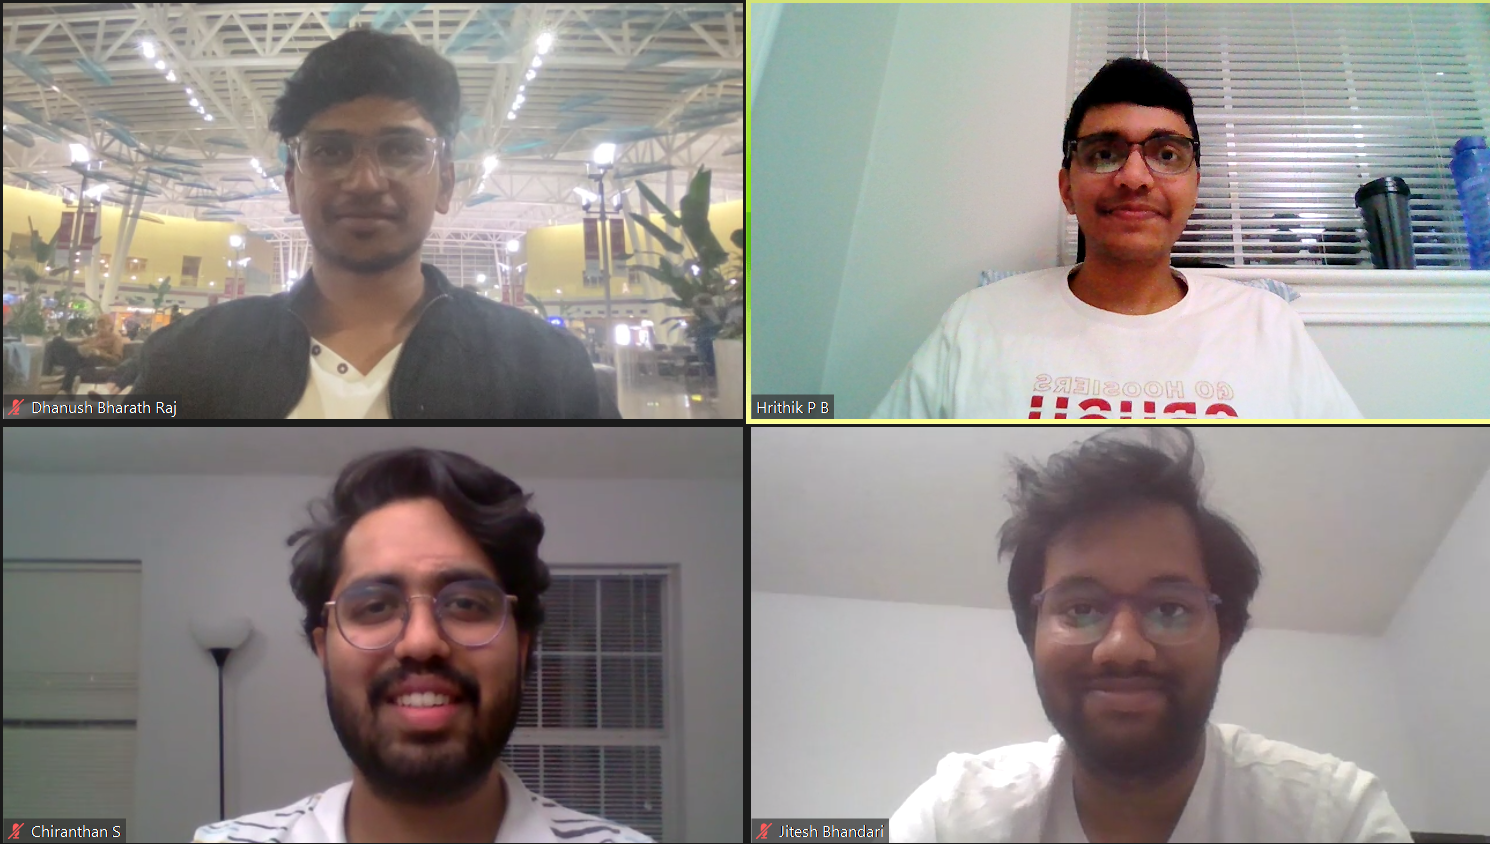

## Phase leader and credit assignment plan


| Phase | Contributors | Description of Contribution |
| --- | --- | --- |
| Phase 4 | Chiranthan | Phase leader |
| Phase 4 | Jitesh Bhandari |  Implement Neural Network, Creating final repository |
| Phase 4 | Hrithik P B | Video presentation planning, Checking Leakage |
| Phase 4 | Dhanush B Raj | Checking Leakage, Appearance of Notebook |
| Phase 4 | Chiranthan | Implement Neural Network, Planning credit assignment, Creating final repository |


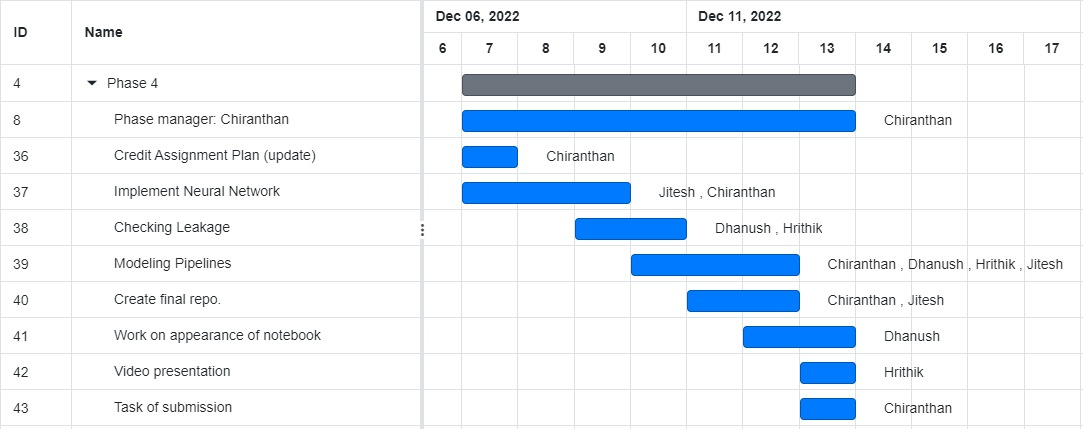



# Credit Assignment Plan (Table) - Phase 4



| Name | Task | Task Description  |
| --- | --- | --- |
| Chiranthan | Credit Assignment plan |Assigning credits for all the members in the team|
| | Implement Neural Network | Continuing  more in depth research on EDA |
| | Creating final repo | Implementing the Discussed Algorithms |
| Hrithik P B |  Video presentation planning | Exploring Visual Analaysis  |
| |  Checking Leakage | Implementing the Discussed Algorithms  |
| Jitesh | Implement Neural Network | fine tuning the model |
| | Creating final repo | Making final   |
| Dhanush | Checking Leakage  | Joining the tables to engineer new features  |
| | Appearance of Notebook | Compiling the whole notebook in a presentable manner   |





## Project Abstract

In phase 4, our primary objective is to implement Neural Network architecture for the HCDR project. Phase 4 initial phase focuses on designing different neural network architectures and checking for the presenece of any data leakage. The dataset considered for this phase is the one we merged from different datasets available and by fine tuning it by dropping trivial attributes. We intend to build 3 different neural networks by adding or removing hidden layers and the weights associated with it. Further we plan to analyse our accuracy of our model by adjusting epoch, batch size and activation function. 

In the entire project, we have used kaggle datasets to perform exploratory data analysis, create machine learning pipelines, and evaluate models according to a variety of criteria before deploying a model. As part of this study, we used a variety of traditional machine learning methods, including Logistic Regression, Random Forest Classifier, XGBoost, to determine with accuracy if a person qualifies for a mortgage. A deep learning model was also set up. We developed a machine learning model for binary classification using Pytorch. A model was created, trained, and evaluated as well.

## Project Description

There are 7 different sources of data:

**application_train/application_test**: The data for training and testing with information about each loan
application at Home Credit.
Each loan has its row as feature SK_ID_CURR as an identifier or a unique key.

The TARGET of training application data has two values indicating 0: indicated the loan was repaid or 1:
the loan was not repaid.

**bureau**: data from other financial organizations about the client's prior credit. Each previous credit has its
own row in the bureau.

**bureau_balance**: monthly information about past credit history in the bureau. A previous credit can include
numerous rows, one for each month of the credit period.

**previous_application**: Past loan applications made by customers with loans at Home Credit are included in
the application data. The application data allows for many prior loans for each current loan. The feature SK
ID PREV serves to distinguish each previous application, which contains one row.

**POS_CASH_BALANCE**: monthly information on prior point-of-sale or cash loans that customers have
taken out through Home Credit. A single previous loan can have numerous rows, each representing a
month from a previous point of sale or cash loan.

**credit_card_balance**: data about prior credit cards that Home Credit customers have had on a monthly
basis. Every row represents a month's worth of credit card debt, and a single credit card may have several
rows.

**installments_payment** : history of payments for prior loans with Home Credit. Every made payment has its
own row, and every missed payment has its own row.



## Tasks to be tackled:
1. Neural Network Implementation
2. Modeling Pipelines using Loss Functions
3. Checking for Leakage in the pipeline

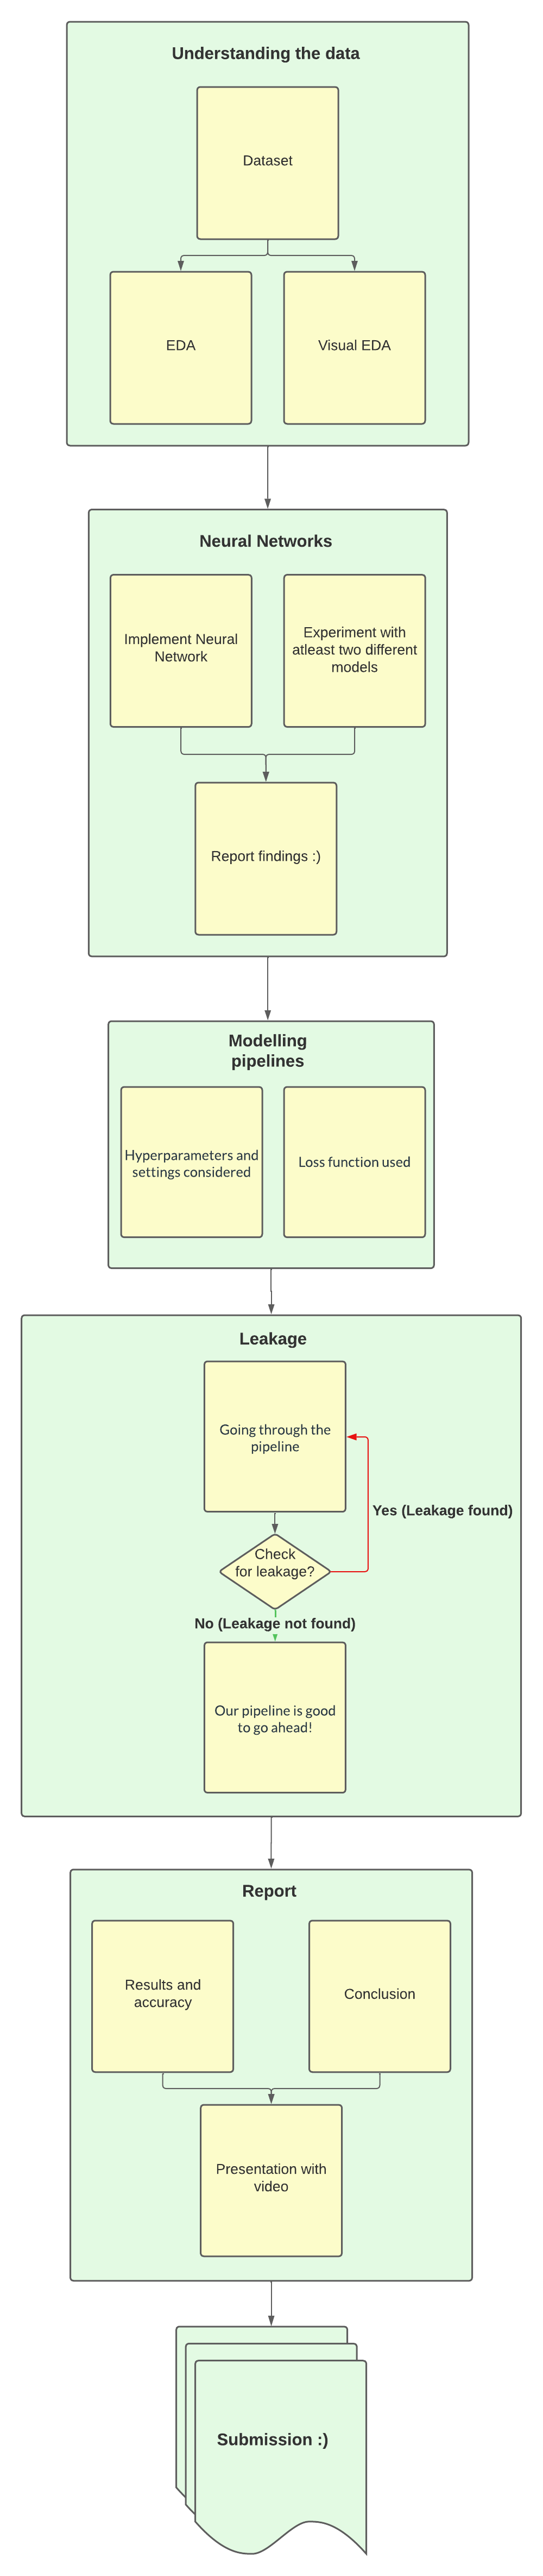

1. We make sure to use the
given dataset as much as
possible by tweaking it
wherever necessary.

2. To tweak the data, we need
to visualize the dataset and
understand it. Therefore, we
perform EDA.

3. Once we gather the required
data, we plan to performed
feature engineering in Phase 3 and
selecting the essential
attributes that contribute to
the accuracy of the data and put it 
into the dataframe called final_features 
which is the dataset we will be used to train
our model with.

4. We will be designing neural network
architecture.We plan to perform experiment
with atleast two different network architectures
by playing around with activation functions and 
hidden layers and report the findings.

5. Later we plan to check for any leakage 
present in our pipeline

6. We record the results
generated.

# Neural Network

In [4]:
from IPython.display import Image


Image(url="https://miro.medium.com/max/1063/0*u-AnjlGU9IxM5_Ju.png",width = 850, height = 850)

When we define a model, we define its layers. To be more specific, we use the forward() function to bypass the layers and propagate input. While there are numerous layers available, we exclusively use Linear, RELU, and Sigmoid only in our model.

* The activation functions RELU and Sigmoid layers. This is demonstrated in our execution above.

* We use stochastic gradient descent as an optimization algorithm while training the model.

We count the number of training epochs in a loop. Then, for mini-batches and stochastic gradient descent, we write an inner loop. Examine the Model We retrieved the numpy array and rounded the values to class values. Then we saved it. The final step is to compute accuracy. So we gathered the predictions for the test dataset, compared them to the predicted values of the test set, and finally calculated the performance metric.

We have designed two neural network models in total.

1st neural network architecture in string form:

161 – 55 – Relu – 15 – Relu – 5 – Relu – 1 – Sigmoid.		

1) 1st Neural Network:

	Hidden layers used: 3
    
	Activation functions used: ReLU and Sigmoid
    
	Epochs: 40
    
	Optimizer selected: SGD
    
	Learning rate: 0.0001

2nd  neural network architecture in string form:

161 – 25 – Relu – 12 – Relu – 1 – Sigmoid.

2)   2nd Neural Network:

	Hidden layers used: 2
    
	Activation functions used: ReLU and Sigmoid
    
	Epochs: 28
    
	Optimizer selected: SGD
    
	Learning rate: 0.0011

# Leakage

Data leaking occurs when the model is created using data that is not part of the training dataset. Data leakage frequently results in unrealistically high levels of performance on the test set since the model is being run on data that it has already seen. To ensure that there is no data leakage, we run the model multiple times. Through multiple runs, we consistently came to the same conclusions, and the accuracy has not significantly improved. To ensure that the outcomes were consistent, we also ran the model independently numerous times on test and validation data. In addition, we did not see any improvement in accuracy throughout the course of those several runs. Additionally, we checked for any duplication.

## Cardinal Sins of ML

As the application_train and application_test datasets were provided to us seperately. We did not make a rookie mistake of abusing the data and model.

Further we have not performed any cross fold validation on the application_train dataset after splitting it so we have refrained from exposing test dataset to be part of training.



# Model Pipeline

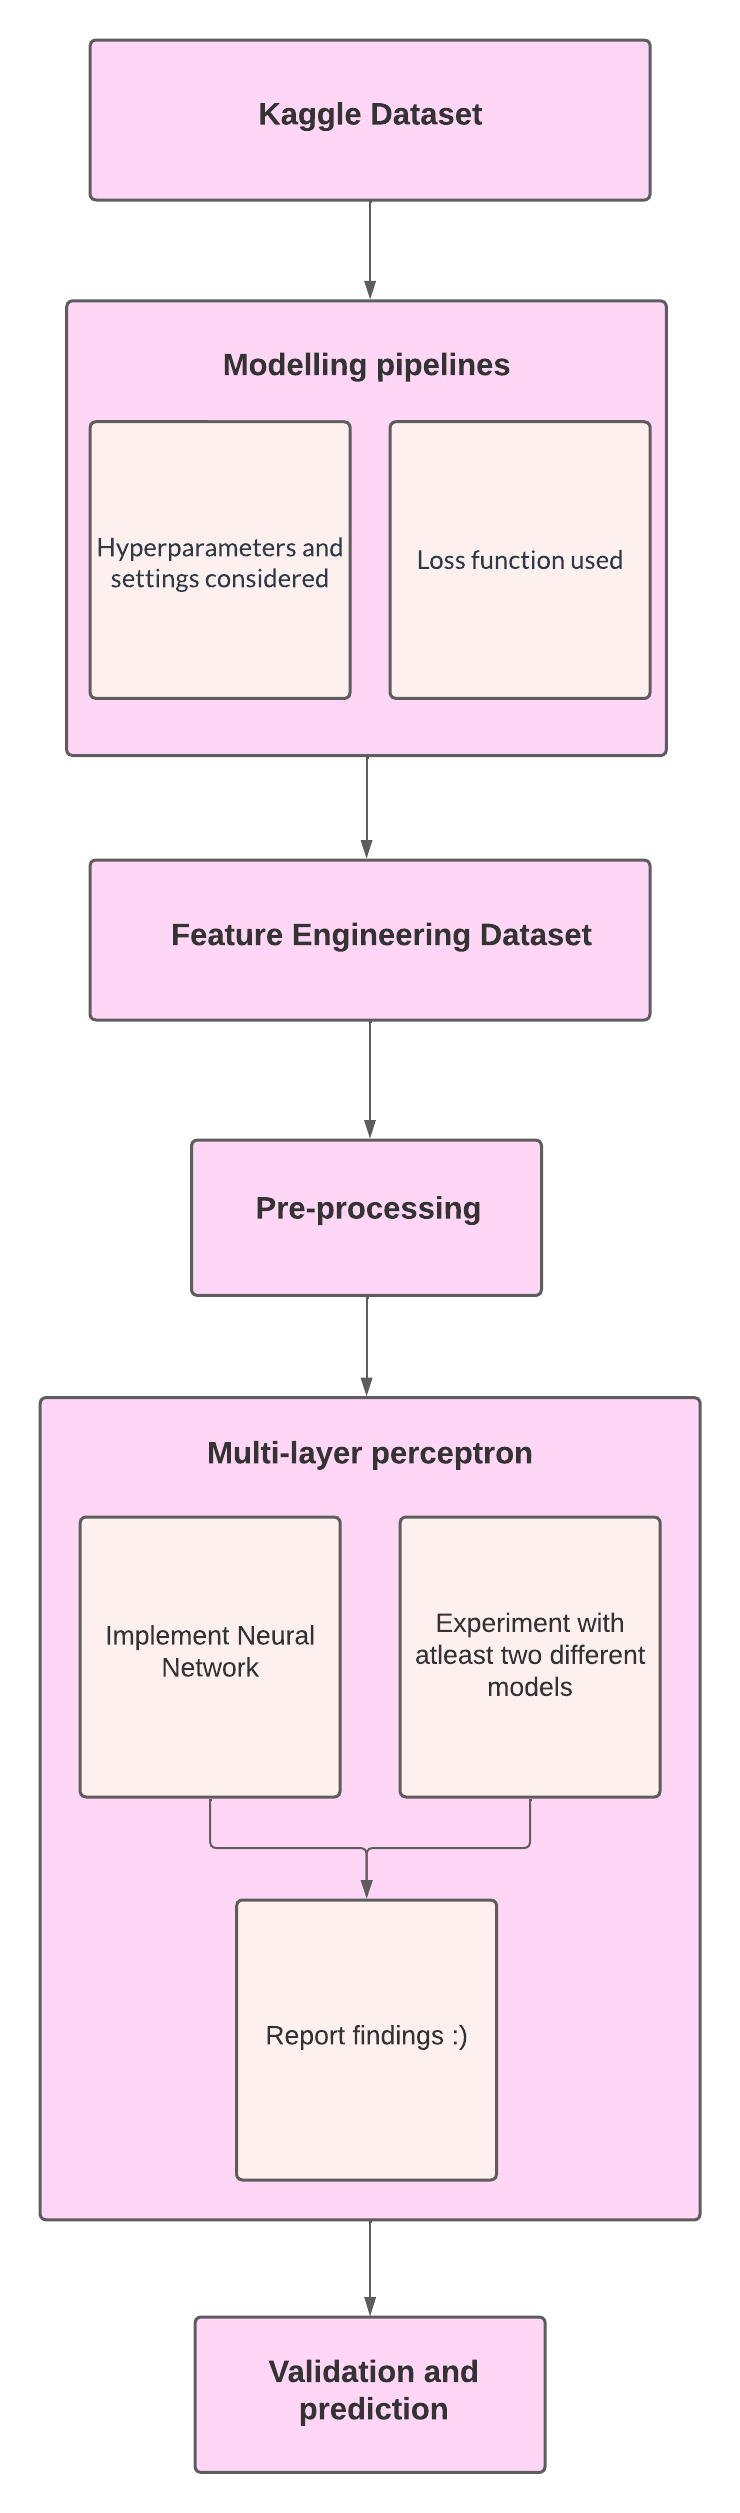

During the previous phase of our project, we examined the data, made an effort to clean and preprocess it, and then started modeling the project using machine learning techniques. As a starting point, we trained our model using logistic regression and Random Forest. Finally, we evaluated how well our models performed in comparison to the baseline models. 

As our problem involves both categorical and numerical variables, and as a final step, we need to forecast the target variable in categorical value itself, i.e. whether the client is creditworthy or not, logistic regression is one of the approaches that we have assumed to provide us the solution. To reach this conclusion, we used a variety of predictors. 

We measured our baseline model using LogLoss, AOC/ROC, and validation accuracy.

# Results and Discussions

## Summarizing all the results 

### Interpretation of Phase 2 Results

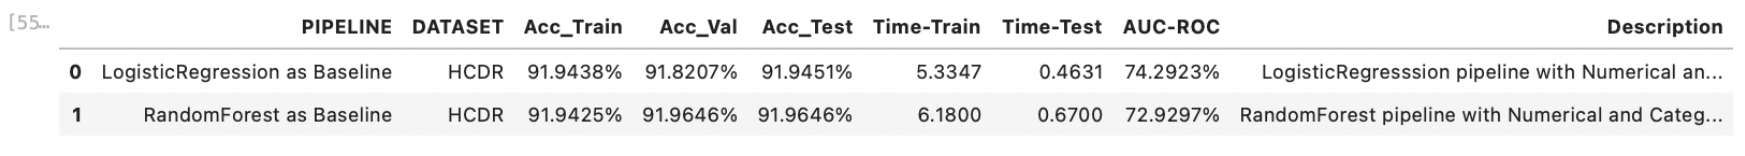

### Interpretation of Phase 3 Results

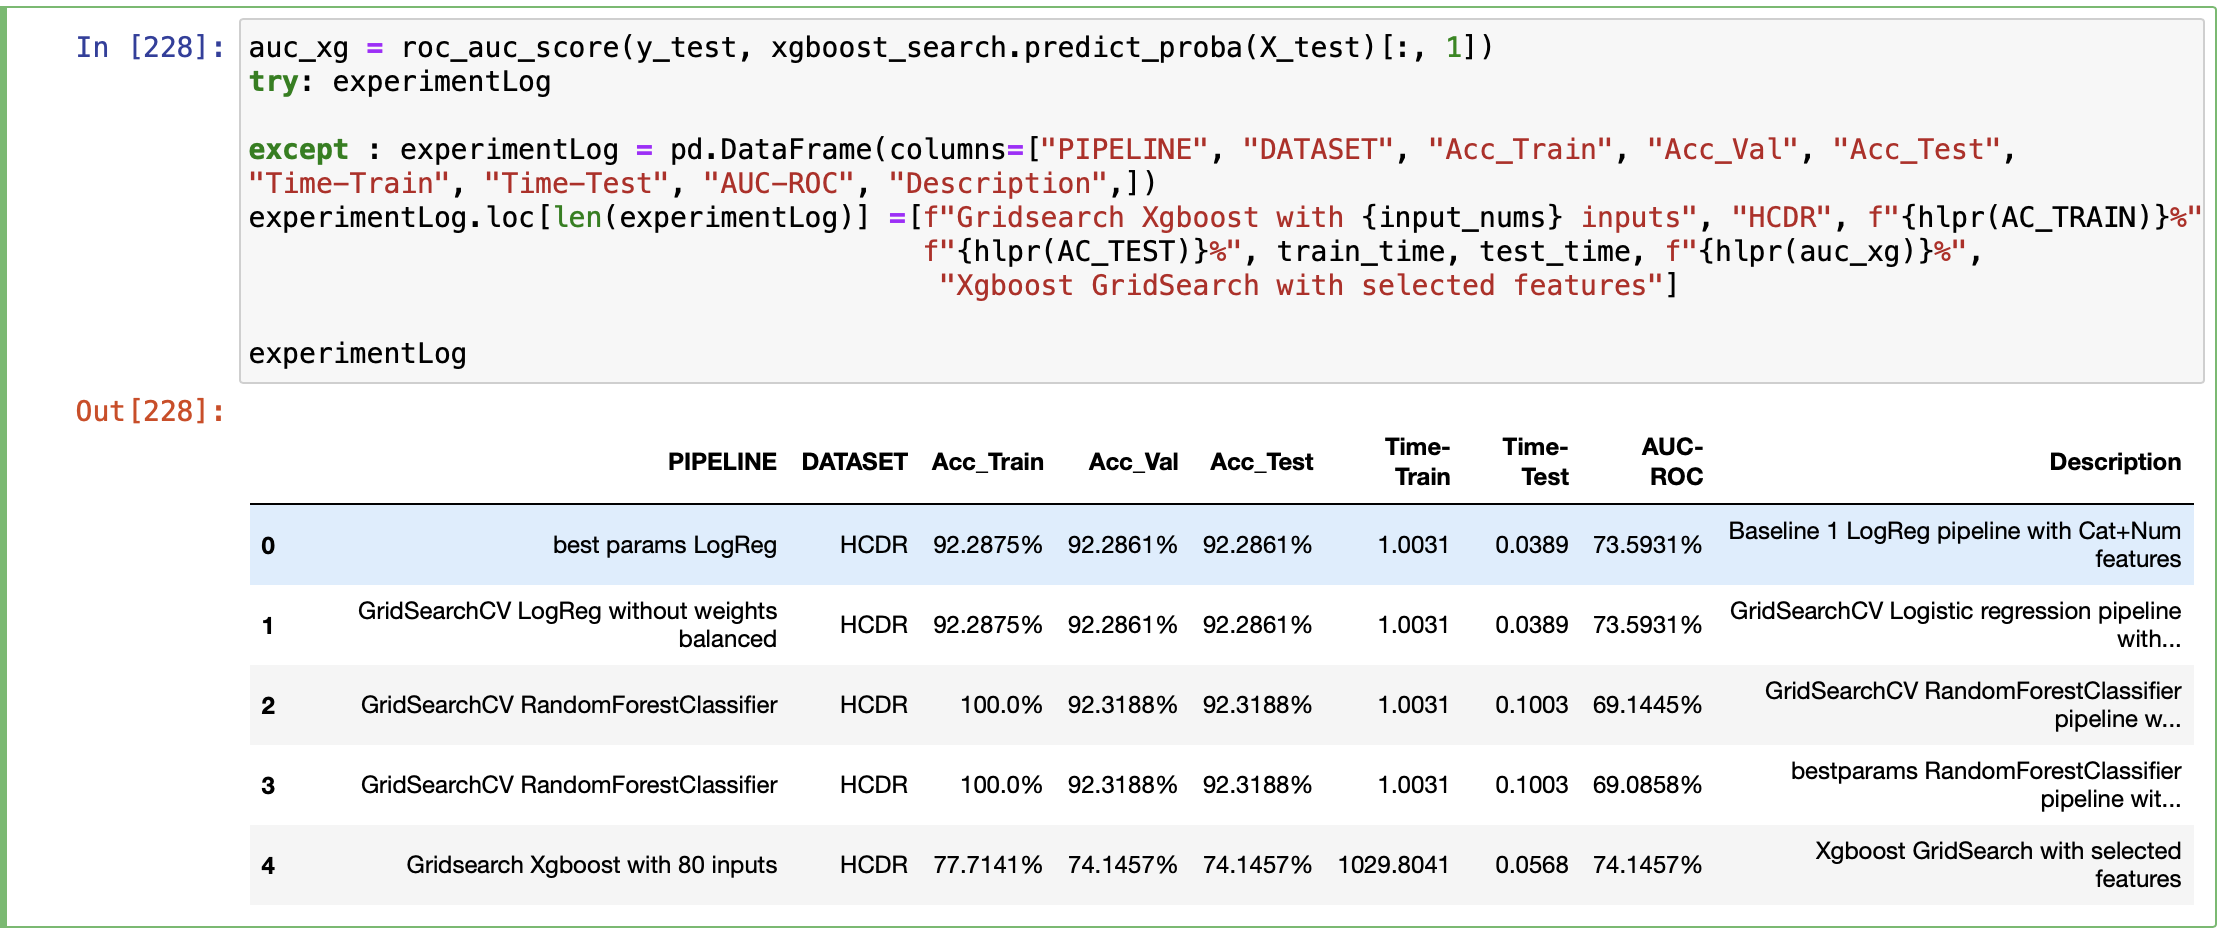


### Interpretation of Phase 4 Results

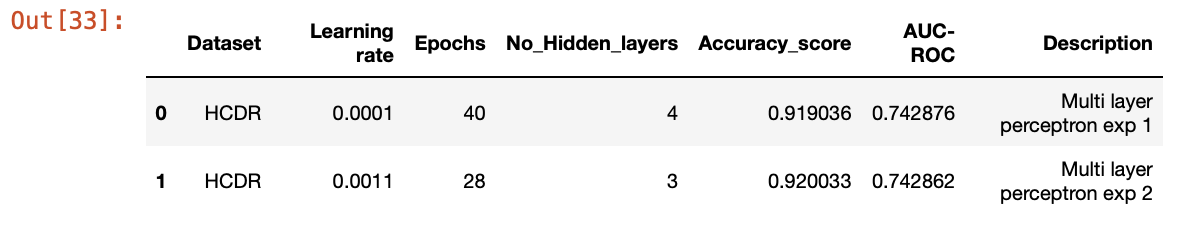

The major aim of the project was to determine if the client is creditworthy or not. In phase 1 of our project we trained the model using logistic regression and random forest regressor without performing any feature engineering or modifications on the dataset and obtain the accuracy of 91.94% on the dataset, later in the next phase after performing hyperparameter tuning and feature engineering to generate a new dataframe after combining multiple tables the model was able to predict with an accuracy of 92.2% and finally in this phase of the project we chose to utilize the dataset from the feature engineered dataframe exported to csv as final_features, we preprocessed this dataset before using it in our multilayer perceptron,later 75% of the data from this table was used for training the neural network model to obtain the accuracies as stated above for different networking models.

# Conclusion

The HCDR project's goal is to forecast the repayment capacity of the affected population. This is a significant project because both the lender and the borrower require well-established projections. Because the data includes people's lives, HomeCredit will require the highest level of precision to ensure that it is forecasted accurately.

We did Exploratory Data Analysis in phase one, where we discovered several insights into the data and learned a lot about how to extract significant information from it.
Following that, we built a baseline model with pipelines and Logistic Regression, learning how to build models, train them, and test them using various metrics. In Phase 3, we finished feature engineering and learned how to design significant features to improve the model. Then we used GridSearchCV to perform Hyperparameter tuning, which taught us how to improve accuracy by combining multiple models. In Phase 4, we created an MLP model and tested it with AUC ROC score, but we did not get the anticipated AUC ROC score by training the dataset with the neural network by the comparison made from the kaggle submissions we can see our neural networks AUC ROC score is slightly less than Logistic Regression AUC ROC score.




# Kaggle Submission

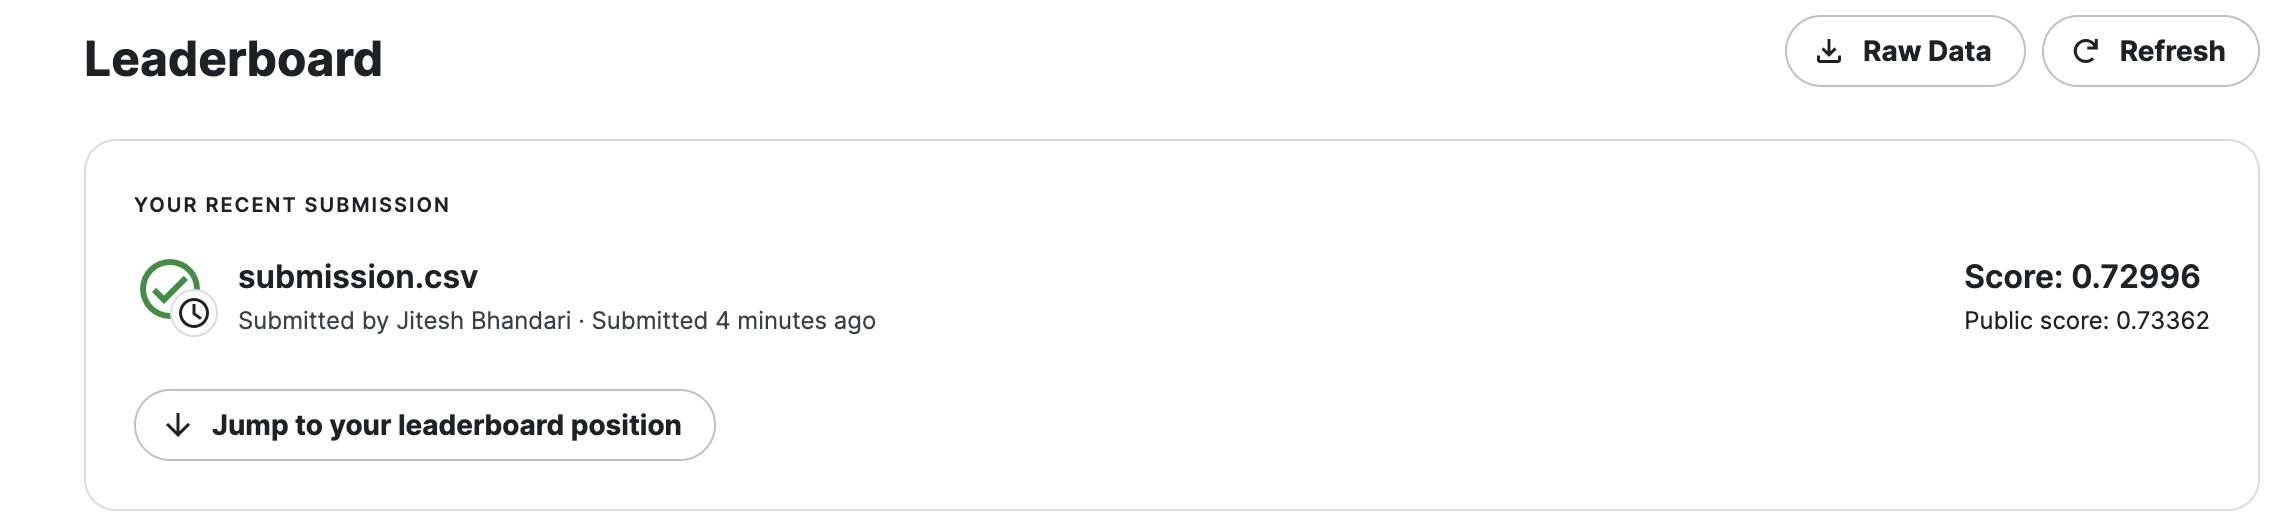

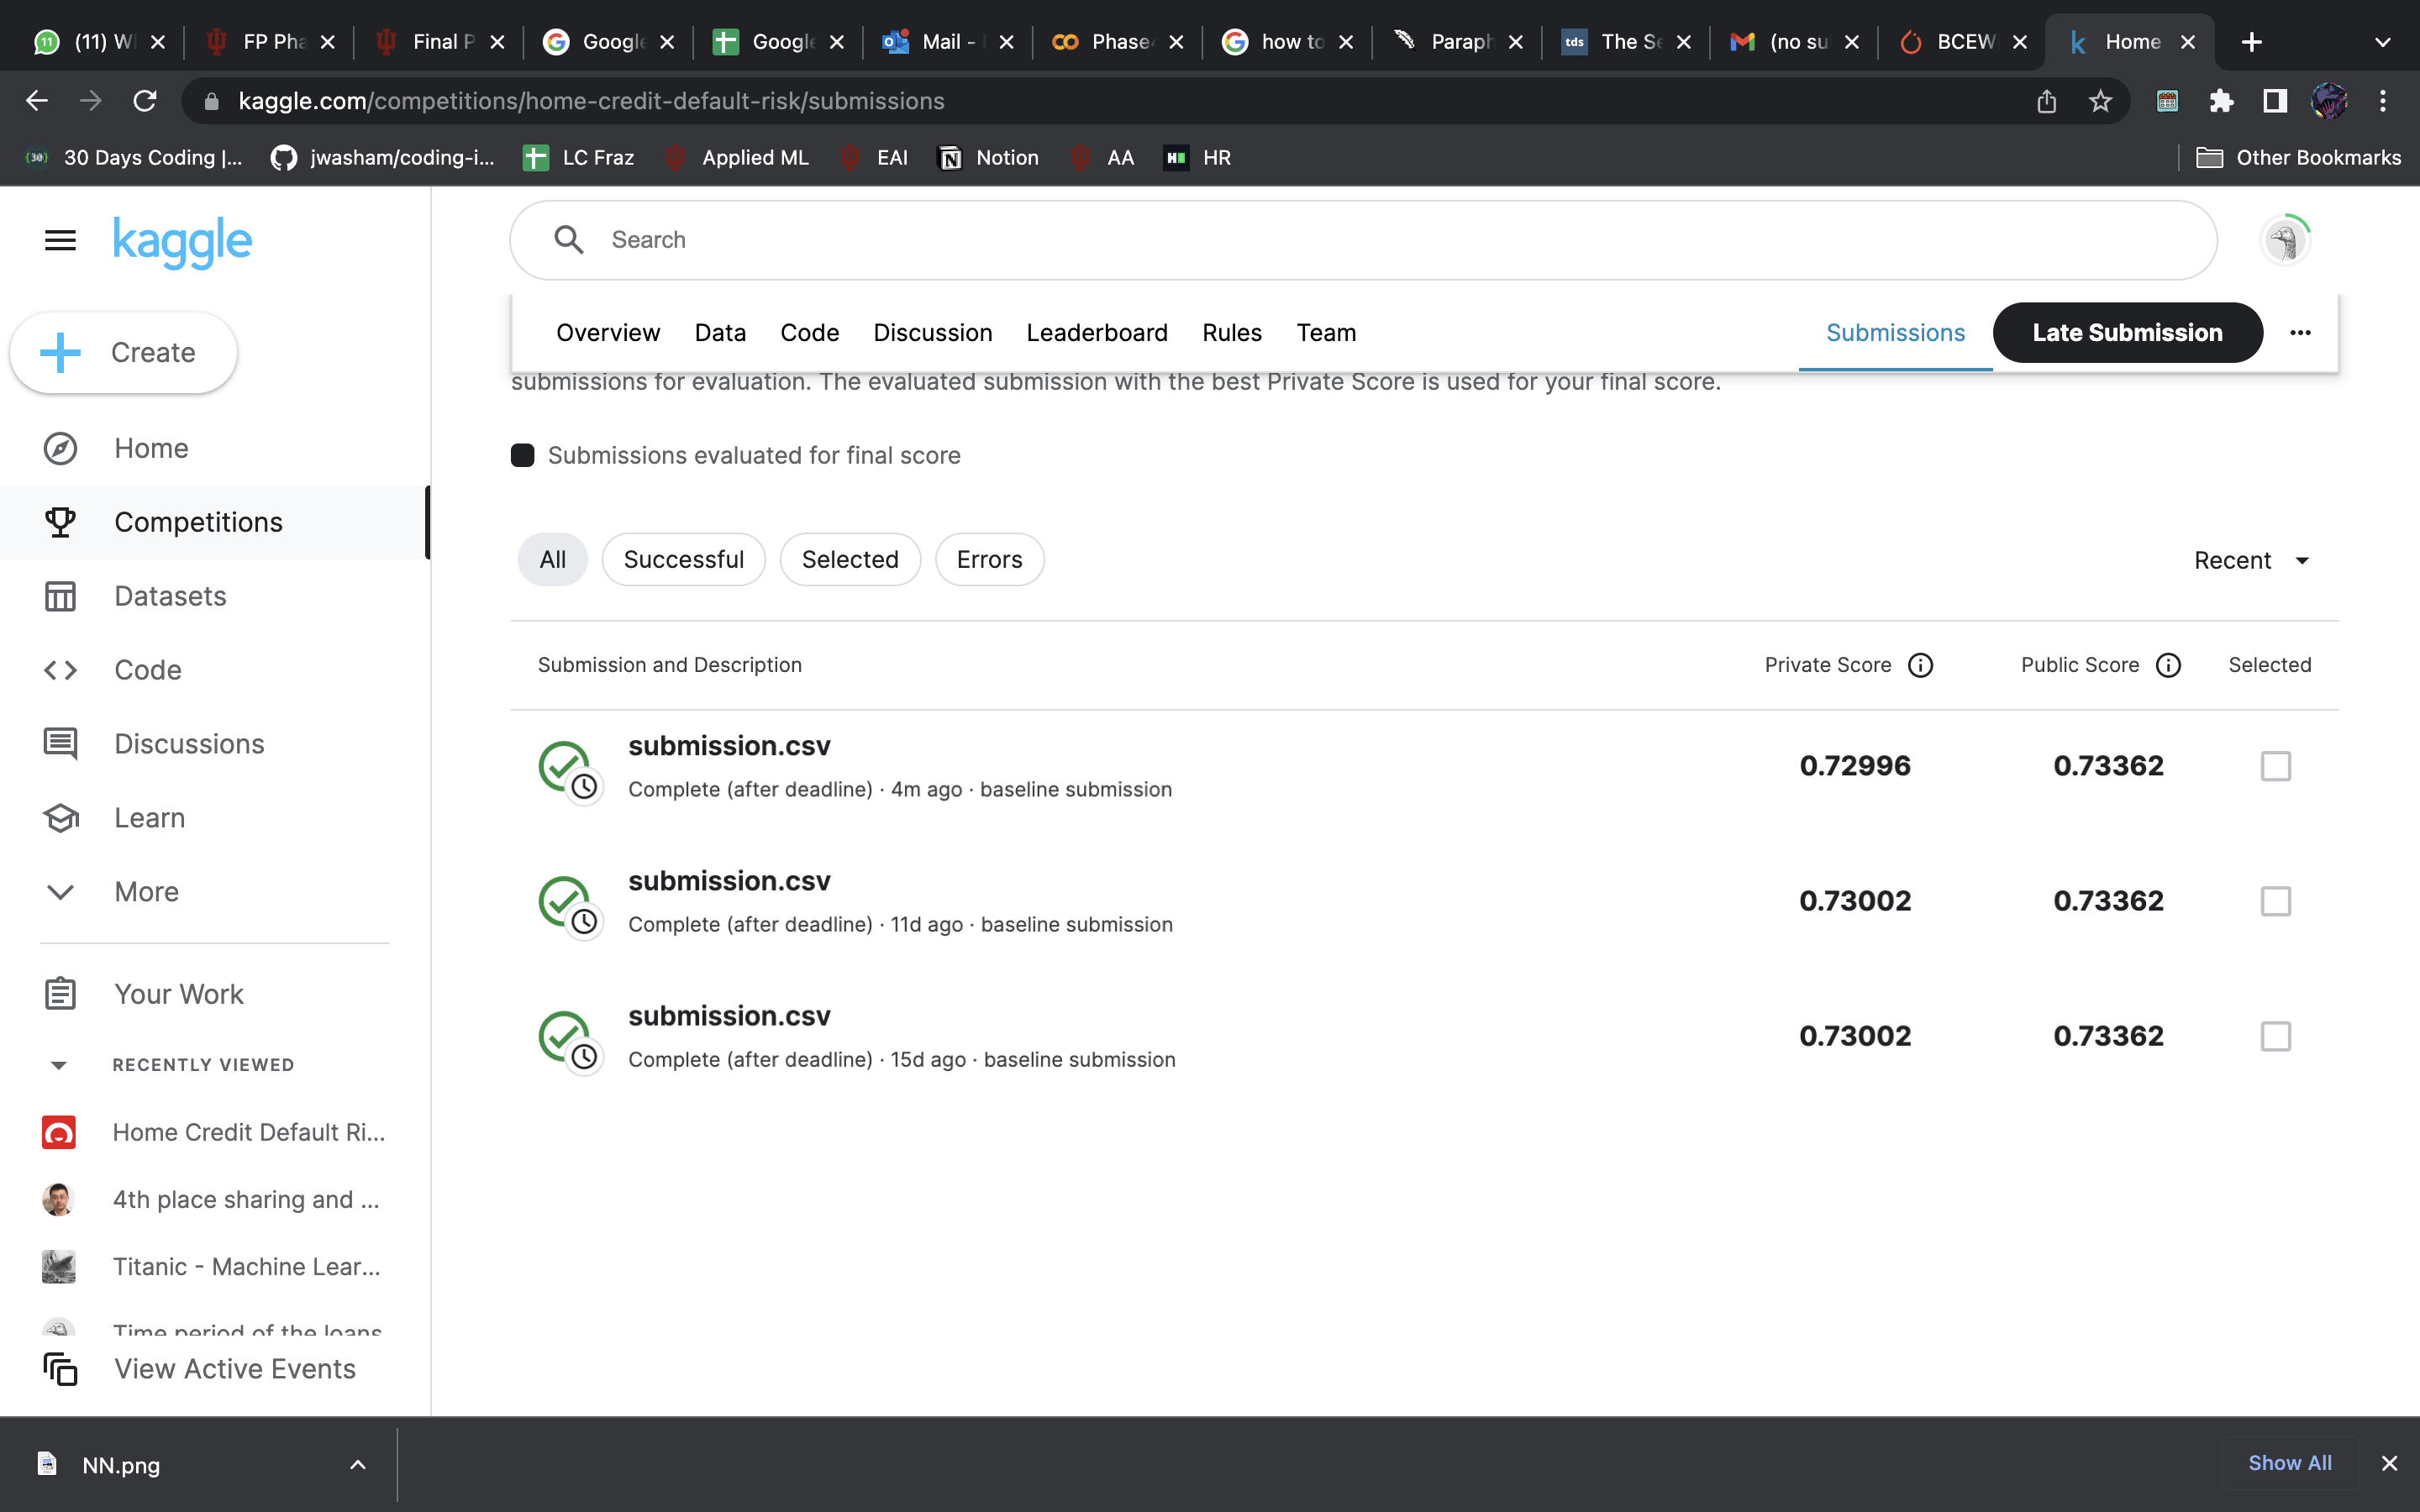